In [1]:
!pip install tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd drive/'MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition'/

/content/drive/MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition


In [5]:
# Now above cell output is our path which is in current working directory
!ls

Dataset  demo_audio  Trained_Models  utils


In [6]:
pip install librosa==0.8.0

In [7]:
# Provides a way of using operating system dependent functionality.
import os

# LibROSA provides the audio analysis
import librosa
# Need to implictly import from librosa
import librosa.display

# Import the audio playback widget
import IPython.display as ipd
from IPython.display import Image

# Enable plot in the notebook
import matplotlib.pyplot as plt

# These are generally useful to have around
import numpy as np
import pandas as pd


# To build Neural Network and Create desired Model
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D #, AveragePooling1D
from keras.layers import Flatten, Dropout, Activation # Input,
from keras.layers import Dense #, Embedding
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [8]:
data, sampling_rate = librosa.load('/content/drive/MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition/Dataset/tausyih_bayati_ashli_nawa/2.1_tausyih_bayati_ashli_nawa_v1_a.wav')
# To play audio this in the jupyter notebook
ipd.Audio('/content/drive/MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition/Dataset/tausyih_bayati_ashli_nawa/2.1_tausyih_bayati_ashli_nawa_v1_a.wav')

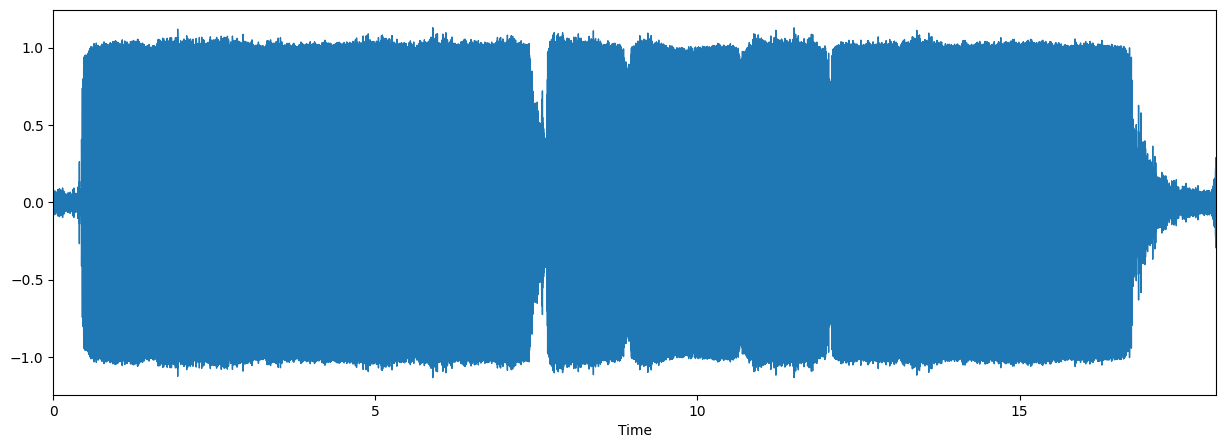

In [9]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [10]:
dataset_path = os.path.abspath('/content/drive/MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition/Dataset')
destination_path = os.path.abspath('./')
# To shuffle the dataset instances/records
randomize = True
# for spliting dataset into training and testing dataset
split = 0.8
# Number of sample per second e.g. 16KHz
sampling_rate = 20000
naghams=["tausyih_bayati_ashli_qorror","tausyih_bayati_ashli_nawa","tausyih_bayati_syuri"]

In [11]:
# loading dataframes using dataset module
from utils import dataset
df, train_df, test_df = dataset.create_and_load_meta_csv_df(dataset_path, destination_path, randomize, split)

In [12]:
print('Dataset samples  : ', len(df),"\nTraining Samples : ", len(train_df),"\ntesting Samples  : ", len(test_df))

Dataset samples  :  15 
Training Samples :  12 
testing Samples  :  3


In [13]:
df.head()

,path,label
0,/content/drive/MyDrive/Colab Notebooks/Dataset...,2
1,/content/drive/MyDrive/Colab Notebooks/Dataset...,1
2,/content/drive/MyDrive/Colab Notebooks/Dataset...,0
3,/content/drive/MyDrive/Colab Notebooks/Dataset...,1
4,/content/drive/MyDrive/Colab Notebooks/Dataset...,2


In [14]:
print("Actual Audio : ", df['path'][0])
print("Labels       : ", df['label'][0])

Actual Audio :  /content/drive/MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition/Dataset/tausyih_bayati_syuri/3.0.1_tausyih_bayati_syuri_v1_a.wav
Labels       :  2


In [15]:
unique_labels = train_df.label.unique()
unique_labels.sort()
print("unique labels in Nagham dataset : ")
print(*unique_labels, sep=', ')
unique_labels_counts = train_df.label.value_counts(sort=False)
print("\n\nCount of unique labels in Nagham dataset : ")
print(*unique_labels_counts,sep=', ')

unique labels in Nagham dataset : 
0, 1, 2


Count of unique labels in Nagham dataset : 
5, 3, 4


In [16]:
# # Histogram of the classes
# plt.bar(unique_labels, unique_labels_counts,align = 'center', width=0.6, color = 'c')
# plt.xlabel('Number of labels', fontsize=16)
# plt.xticks(unique_labels)
# plt.ylabel('Count of each labels', fontsize=16)
# plt.title('Histogram of the Labels', fontsize=16)
# plt.show()

In [17]:
# Image('/content/drive/MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition/utils/images/feature_plots.png')

In [18]:
from utils.feature_extraction import get_features_dataframe
from utils.feature_extraction import get_audio_features

trainfeatures, trainlabel = get_features_dataframe(train_df, sampling_rate)
testfeatures, testlabel = get_features_dataframe(test_df, sampling_rate)

# get the featured dataframe.
# store it into pickle file to use it for later purpose.

# trainfeatures = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition/features_dataframe/trainfeatures')
# trainlabel = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition/features_dataframe/trainlabel')
# testfeatures = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition/features_dataframe/testfeatures')
# testlabel = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition/features_dataframe/testlabel')

In [19]:
trainfeatures.shape

(12, 65)

In [20]:
trainfeatures = trainfeatures.fillna(0)
testfeatures = testfeatures.fillna(0)

In [21]:
# By using .ravel() : Converting 2D to 1D e.g. (512,1) -> (512,). To prevent DataConversionWarning

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel).ravel()
X_test = np.array(testfeatures)
y_test = np.array(testlabel).ravel()

In [22]:
y_train[:5]

array([2, 1, 0, 1, 2])

In [23]:
# One-Hot Encoding
lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

In [24]:
y_train[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [25]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [26]:
x_traincnn.shape

(12, 65, 1)

In [27]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00001, rho=0.9)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 65, 256)           1536      
                                                                 
 activation (Activation)     (None, 65, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 65, 128)           163968    
                                                                 
 activation_1 (Activation)   (None, 65, 128)           0         
                                                                 
 dropout (Dropout)           (None, 65, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 8, 128)            0         
 D)                                                              
                                                        

In [29]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [30]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=400, validation_data=(x_testcnn, y_test))

Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 1.8042 - accuracy: 0.1667 - val_loss: 0.9173 - val_accuracy: 0.3333
Epoch 2/400
1/1 [==============================] - 0s 80ms/step - loss: 1.2920 - accuracy: 0.4167 - val_loss: 0.8510 - val_accuracy: 0.6667
Epoch 3/400
1/1 [==============================] - 0s 61ms/step - loss: 1.3477 - accuracy: 0.2500 - val_loss: 0.8158 - val_accuracy: 0.6667
Epoch 4/400
1/1 [==============================] - 0s 79ms/step - loss: 1.1578 - accuracy: 0.3333 - val_loss: 0.7871 - val_accuracy: 1.0000
Epoch 5/400
1/1 [==============================] - 0s 80ms/step - loss: 1.1366 - accuracy: 0.3333 - val_loss: 0.7709 - val_accuracy: 0.6667
Epoch 6/400
1/1 [==============================] - 0s 77ms/step - loss: 1.1005 - accuracy: 0.3333 - val_loss: 0.7518 - val_accuracy: 1.0000
Epoch 7/400
1/1 [==============================] - 0s 82ms/step - loss: 0.9469 - accuracy: 0.5000 - val_loss: 0.7321 - val_accuracy: 1.0000
Epoch 8/400
1/1 [=====

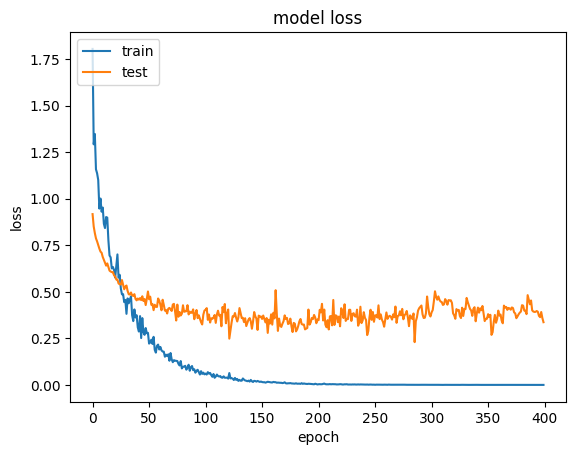

In [31]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
model_name = 'Nagham_Audio_Recognition_Model.h5'
save_dir = os.path.join(os.getcwd(), 'Trained_Models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition/Trained_Models/Nagham_Audio_Recognition_Model.h5 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [34]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition/Trained_Models/Nagham_Audio_Recognition_Model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 66.67%


In [35]:
preds = loaded_model.predict(x_testcnn,
                         batch_size=32,
                         verbose=1)

1/1 [==============================] - 0s 140ms/step


In [36]:
preds

array([[4.0974485e-04, 9.8764718e-01, 1.1943143e-02],
       [3.6944816e-01, 7.8114128e-04, 6.2977076e-01],
       [1.7854039e-03, 1.0629358e-03, 9.9715167e-01]], dtype=float32)

In [37]:
preds1=preds.argmax(axis=1)

In [38]:
preds1

array([1, 2, 2])

In [39]:
abc = preds1.astype(int).flatten()

In [40]:
predictions = (lb.inverse_transform((abc)))

In [41]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,1
1,2
2,2


In [42]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [43]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,1
1,0
2,2


In [44]:
finaldf = actualdf.join(preddf)

In [45]:
finaldf[170:180]

,actualvalues,predictedvalues


In [46]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
0,1
1,1
2,1


In [47]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
1,1
2,2


In [48]:
finaldf.to_csv('Predictions.csv', index=False)

In [49]:
demo_audio_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Nagham Audio Recognition/Dataset/tausyih_bayati_ashli_qorror/1.4_tausyih_bayati_ashli_qorror_v1_a.wav'

In [50]:
demo_mfcc, demo_pitch, demo_mag, demo_chrom = get_audio_features(demo_audio_path,sampling_rate)

mfcc = pd.Series(demo_mfcc)
pit = pd.Series(demo_pitch)
mag = pd.Series(demo_mag)
C = pd.Series(demo_chrom)
demo_audio_features = pd.concat([mfcc,pit,mag,C],ignore_index=True)

In [51]:
demo_audio_features= np.expand_dims(demo_audio_features, axis=0)
demo_audio_features= np.expand_dims(demo_audio_features, axis=2)

In [52]:
demo_audio_features.shape

(1, 65, 1)

In [53]:
livepreds = loaded_model.predict(demo_audio_features,
                         batch_size=32,
                         verbose=1)

1/1 [==============================] - 0s 19ms/step


In [54]:
livepreds

array([[0.36944842, 0.00078114, 0.62977034]], dtype=float32)

In [55]:
# naghams=["tausyih_bayati_ashli_qorror","tausyih_bayati_ashli_nawa","tausyih_bayati_syuri"]
index = livepreds.argmax(axis=1).item()
index

2

In [56]:
naghams[index]

'tausyih_bayati_syuri'